In [138]:
# import helper
import pandas as pd
from utils import *

import time
import numpy as np
import math
import matplotlib.pyplot as plt

import torch
from torch.utils.data import DataLoader
from torch import nn

from IPython.display import Image

import torch
from torch import nn
from torch.utils.data import Dataset
import pennylane as qml
import torch.optim as optim
import torch.utils.data as data
import random
import tensorflow as tf

In [139]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams.update({'font.size':20})
legend_prop = {'weight':'bold'}
from pylab import rcParams
rcParams['axes.linewidth'] = 2

In [140]:
df = pd.read_csv('dataset_FTSE_prediction_v1.csv')
df=df.drop(columns=['ARIMA'])
df = df.drop([ 'Unnamed: 0'], axis=1)
df=df[800:]

In [141]:
df

,Adj Close,BBB_20_2.0,BBL_20_2.0,BBM_20_2.0,BBP_20_2.0,BBU_20_2.0,CUMLOGRET_1,Close,Crude Futures,EMA_10,...,GBP USD,Gold in USD,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,SMA_10,SMA_20,SMA_50,Volume,Close_copy
800,6639.7,3.533963,6680.419909,6800.585,-0.169433,6920.750091,0.203211,6639.7,97.00,6745.857747,...,1.63,1221.2,-17.732464,-21.671968,3.939505,6763.72,6800.585,6759.916,927894000,6639.7
801,6649.4,4.020968,6655.511622,6792.065,-0.022378,6928.618378,0.204671,6649.4,97.00,6728.319975,...,1.63,1214.1,-24.779643,-22.975318,-1.804325,6747.96,6792.065,6757.914,589221500,6649.4
802,6646.6,4.406844,6633.669007,6783.130,0.043259,6932.590993,0.204250,6646.6,97.20,6713.461797,...,1.62,1217.5,-30.241910,-22.750068,-7.491842,6732.20,6783.130,6756.278,564786600,6646.6
803,6622.7,4.819363,6609.601955,6772.805,0.040128,6936.008045,0.200647,6622.7,94.67,6696.959652,...,1.62,1210.5,-36.083380,-22.873230,-13.210149,6715.25,6772.805,6752.826,882273900,6622.7
804,6557.5,5.366750,6575.684353,6757.000,-0.050146,6938.315647,0.190753,6557.5,94.16,6671.603352,...,1.62,1214.6,-45.449963,-25.791851,-19.658112,6692.91,6757.000,6748.012,789707300,6557.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3134,7426.1,5.115504,7210.146579,7399.405,0.570525,7588.663421,0.315145,7426.1,90.60,7423.197029,...,1.26,1918.1,-17.311680,14.831437,-32.143118,7416.99,7399.405,7474.952,448751100,7426.1
3135,7441.7,4.384831,7228.528220,7390.560,0.657809,7552.591780,0.317243,7441.7,89.92,7426.561205,...,1.25,1917.5,-14.436416,14.165362,-28.601777,7427.80,7390.560,7474.352,456225400,7441.7
3136,7478.2,4.210870,7232.704989,7388.260,0.789094,7543.815011,0.322136,7478.2,90.65,7435.950077,...,1.25,1918.4,-9.107517,15.595408,-24.702925,7441.76,7388.260,7473.286,651366100,7478.2
3137,7496.9,4.170076,7233.707713,7387.745,0.854314,7541.782287,0.324634,7496.9,90.64,7447.031881,...,1.25,1923.3,-3.336926,17.092799,-20.429725,7457.59,7387.745,7472.678,568717300,7496.9


In [142]:
df = df.reset_index(drop=True)

In [143]:
target = "Close"
target_mean = df[target].mean()
target_stdev = df[target].std()

for c in df.columns:
    mean = df[c].mean()
    stdev = df[c].std()

    df[c] = (df[c] - mean) / stdev

In [144]:
df

,Adj Close,BBB_20_2.0,BBL_20_2.0,BBM_20_2.0,BBP_20_2.0,BBU_20_2.0,CUMLOGRET_1,Close,Crude Futures,EMA_10,...,GBP USD,Gold in USD,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,SMA_10,SMA_20,SMA_50,Volume,Close_copy
0,-0.664382,-0.518756,-0.212867,-0.376660,-2.096023,-0.541526,-0.618721,-0.664382,1.732245,-0.477768,...,2.765372,-0.923083,-0.285174,-0.957418,0.029832,-0.442130,-0.376660,-0.460099,0.479939,-0.664382
1,-0.646763,-0.405198,-0.255201,-0.392525,-1.648446,-0.526270,-0.600796,-0.646763,1.732245,-0.510207,...,2.765372,-0.947383,-0.387140,-1.015113,-0.059456,-0.471115,-0.392525,-0.463963,-0.746811,-0.646763
2,-0.651849,-0.315221,-0.292326,-0.409164,-1.448674,-0.518568,-0.605967,-0.651849,1.742954,-0.537690,...,2.671345,-0.935746,-0.466173,-1.005142,-0.147868,-0.500101,-0.409164,-0.467120,-0.835320,-0.651849
3,-0.695260,-0.219031,-0.333231,-0.428391,-1.458203,-0.511942,-0.650199,-0.695260,1.607479,-0.568214,...,2.671345,-0.959704,-0.550693,-1.010594,-0.236759,-0.531275,-0.428391,-0.473782,0.314693,-0.695260
4,-0.813687,-0.091393,-0.390878,-0.457822,-1.732959,-0.507468,-0.771680,-0.813687,1.580170,-0.615116,...,2.671345,-0.945671,-0.686218,-1.139791,-0.336992,-0.572362,-0.457822,-0.483073,-0.020605,-0.813687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,0.764009,-0.149978,0.687472,0.738442,0.156114,0.753486,0.755674,0.764009,1.389541,0.775099,...,-0.713624,1.462017,-0.279086,0.658465,-0.531071,0.759355,0.738442,0.919877,-1.255627,0.764009
2335,0.792344,-0.320354,0.718714,0.721971,0.421769,0.683547,0.781440,0.792344,1.353128,0.781322,...,-0.807650,1.459964,-0.237484,0.628980,-0.476021,0.779237,0.721971,0.918719,-1.228554,0.792344
2336,0.858642,-0.360917,0.725812,0.717688,0.821349,0.666530,0.841517,0.858642,1.392218,0.798688,...,-0.807650,1.463044,-0.160380,0.692283,-0.415414,0.804912,0.717688,0.916662,-0.521709,0.858642
2337,0.892608,-0.370429,0.727517,0.716729,1.019851,0.662588,0.872183,0.892608,1.391683,0.819186,...,-0.807650,1.479814,-0.076886,0.758568,-0.348987,0.834026,0.716729,0.915488,-0.821082,0.892608


In [145]:
normalized_df=df.copy()

In [146]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca_=pca.fit_transform(normalized_df)

pca_new = pd.DataFrame(data = pca_, 
                            columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
 
pca_new.head(6)

new_feat=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']

df = pd.concat([pca_new, normalized_df['Close']], axis=1)

In [147]:
df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Close
0,2.108170,0.702469,-2.844094,-0.099859,-1.020669,1.238666,2.503423,-0.150600,-0.820877,0.806143,-0.664382
1,2.108215,0.363836,-2.828886,0.266103,-1.811063,0.630044,2.128497,0.369436,-0.526185,0.869817,-0.646763
2,2.153506,0.386931,-2.648364,0.334428,-1.893739,0.583023,2.038340,0.441441,-0.396856,0.929470,-0.651849
3,2.324292,0.810604,-2.410768,0.209686,-1.190992,1.243257,2.220869,0.085721,-0.342698,0.862933,-0.695260
4,2.527591,1.058314,-2.590234,0.211688,-1.399613,0.953939,2.153437,0.257960,-0.462441,0.834016,-0.813687
...,...,...,...,...,...,...,...,...,...,...,...
2334,-2.287592,-0.140971,0.542457,-1.075055,-2.807883,0.317118,-0.903373,-0.864151,-0.339452,0.574277,0.764009
2335,-2.323800,-0.341136,0.610022,-1.090985,-2.732015,0.307271,-0.956643,-0.952267,-0.105763,0.645899,0.792344
2336,-2.384054,-0.433716,0.931710,-1.153344,-2.332633,0.838232,-0.813187,-1.158625,0.145874,0.698167,0.858642
2337,-2.441794,-0.696476,0.983757,-1.086775,-2.514274,0.736916,-0.917029,-1.044987,0.208581,0.703511,0.892608


In [148]:
target_sensor = "Close"
features_ = list(df.columns.difference([target_sensor]))

forecast_lead = 20
target_ = f"{target_sensor}_lead{forecast_lead}"

df[target_] = df[target_sensor].shift(-forecast_lead)
df= df.iloc[:-forecast_lead]

In [149]:
len(df)

2319

In [150]:
df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Close,Close_lead20
0,2.108170,0.702469,-2.844094,-0.099859,-1.020669,1.238666,2.503423,-0.150600,-0.820877,0.806143,-0.664382,-1.064891
1,2.108215,0.363836,-2.828886,0.266103,-1.811063,0.630044,2.128497,0.369436,-0.526185,0.869817,-0.646763,-1.120290
2,2.153506,0.386931,-2.648364,0.334428,-1.893739,0.583023,2.038340,0.441441,-0.396856,0.929470,-0.651849,-1.166063
3,2.324292,0.810604,-2.410768,0.209686,-1.190992,1.243257,2.220869,0.085721,-0.342698,0.862933,-0.695260,-1.095769
4,2.527591,1.058314,-2.590234,0.211688,-1.399613,0.953939,2.153437,0.257960,-0.462441,0.834016,-0.813687,-1.001863
...,...,...,...,...,...,...,...,...,...,...,...,...
2314,-3.427825,0.312195,0.073433,-2.008484,-0.859147,1.875797,-0.522803,-0.905177,-0.025824,0.395187,1.056807,0.764009
2315,-3.542739,-0.284197,-0.108410,-1.611067,-1.878308,0.934298,-0.980904,-0.473033,-0.014042,0.375980,1.113660,0.792344
2316,-3.372891,0.052906,-0.734499,-1.768476,-2.136846,0.362695,-0.954410,-0.423673,-0.507180,0.342017,0.942195,0.858642
2317,-3.238951,0.861915,-0.557950,-2.280214,-0.687955,1.643153,-0.345809,-1.312395,-0.488979,0.320784,0.911316,0.892608


We identify the dependent and independent variables:

In [151]:
target = "Close_lead20"

In [152]:
# features = list(df.columns.difference(["Close_lead30",'Close']))
features=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']

## Data processing for time series model

To process the data, we first define few terms

In [153]:
 # batch_size=16 # Number of training instances in the batch
torch.manual_seed(42)
random.seed(42)

Next, in order to ensure that some values due to their mangnitude do not inherently dominate the features, we standardize their values.

In [154]:
df_t=df[:len(df)-forecast_lead]
df_tail=df[len(df)-forecast_lead:len(df)]

In [155]:
df_t

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Close,Close_lead20
0,2.108170,0.702469,-2.844094,-0.099859,-1.020669,1.238666,2.503423,-0.150600,-0.820877,0.806143,-0.664382,-1.064891
1,2.108215,0.363836,-2.828886,0.266103,-1.811063,0.630044,2.128497,0.369436,-0.526185,0.869817,-0.646763,-1.120290
2,2.153506,0.386931,-2.648364,0.334428,-1.893739,0.583023,2.038340,0.441441,-0.396856,0.929470,-0.651849,-1.166063
3,2.324292,0.810604,-2.410768,0.209686,-1.190992,1.243257,2.220869,0.085721,-0.342698,0.862933,-0.695260,-1.095769
4,2.527591,1.058314,-2.590234,0.211688,-1.399613,0.953939,2.153437,0.257960,-0.462441,0.834016,-0.813687,-1.001863
...,...,...,...,...,...,...,...,...,...,...,...,...
2294,-2.613151,1.861842,0.312500,-1.221266,-1.410887,1.041809,-0.453644,-1.162319,0.293908,-0.000701,0.745845,1.056807
2295,-2.685890,1.150226,0.303582,-0.791230,-2.391724,0.260100,-0.706676,-0.828741,0.159803,-0.026245,0.789620,1.113660
2296,-2.623787,0.968565,0.389572,-0.715274,-2.320723,0.348516,-0.633862,-1.029921,0.056531,-0.128744,0.779448,0.942195
2297,-2.549867,0.762691,0.199343,-0.602111,-2.658348,-0.101399,-0.784984,-0.911806,-0.131685,-0.169060,0.728227,0.911316


In [156]:
target

'Close_lead20'

In [157]:
df_tail

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Close,Close_lead20
2299,-2.868264,0.027811,1.610243,-0.507487,-1.811314,1.291615,-0.593715,-1.480623,0.514449,-0.086747,1.058442,0.638316
2300,-3.062107,-0.615508,1.820501,-0.231175,-2.335944,0.914823,-0.924532,-1.165897,0.269055,-0.072851,1.163610,0.553492
2301,-3.177595,-0.934271,1.830569,-0.169043,-2.612020,0.745319,-1.026892,-0.939003,-0.100678,-0.086677,1.195578,0.466670
2302,-3.275915,-1.063213,1.863808,-0.246402,-2.563391,0.880005,-1.001965,-0.837751,-0.368574,-0.077744,1.222642,0.458314
2303,-3.387471,-1.228650,1.821763,-0.328179,-2.670900,0.769734,-1.130351,-0.617584,-0.578978,-0.042063,1.246618,0.481927
2304,-3.345494,-0.883221,1.863028,-0.694818,-1.843526,1.609011,-0.821381,-0.902325,-0.668060,-0.135086,1.219554,0.572201
2305,-3.411435,-0.785345,1.862343,-0.860027,-1.453068,2.035618,-0.704413,-0.912670,-0.693559,-0.062963,1.248434,0.595995
2306,-3.503840,-1.000381,1.622305,-0.897354,-1.945810,1.513847,-0.979874,-0.476809,-0.764052,-0.016934,1.251159,0.605077
2307,-3.563131,-1.106798,1.400062,-0.937076,-2.211565,1.355688,-1.068279,-0.182683,-0.775531,-0.050709,1.260422,0.605077
2308,-3.534856,-0.979020,1.111838,-1.043377,-2.159454,1.223189,-1.187083,-0.008337,-0.819514,0.032905,1.200300,0.834666


## Data processing for regression model

In [158]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
def cal_metrics(y_true,y_pred):
    mae=0
    rmse=0
    for i in range(len(y_true)):
        y1=y_true[i].flatten().numpy()* target_stdev + target_mean
        y2=y_pred[i].flatten()* target_stdev + target_mean
        mae=mean_absolute_error(y1, y2)+mae
        rmse=mean_squared_error(y1, y2, squared=False)+rmse  
    return mae/len(y_true) , rmse/len(y_true)

In [159]:
features

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

In [160]:
target

'Close_lead20'

In [161]:
# Data for regression model
sequence_length_reg = window_reg =20 # Number of time steps that will be inputted into LSTM network

def create_dataset_reg(dataset,target,features, lookback, window):
    X_store, y_store = [], []
    for i in range(0,len(dataset)-lookback,5):
        X = (dataset[features].values)[i:i+lookback]
        y = (dataset[target].values)[i:i+lookback]
        X_store.append(X)
        y_store.append(y)
    return X_store,y_store

X_reg,y_reg = create_dataset_reg(
    df_t,
    target=target,
    features=features,
    lookback=sequence_length_reg, window=window_reg)

print(np.array(X_reg).shape, np.array(y_reg).shape)

(456, 20, 10) (456, 20)


In [162]:
indices = tf.range(start=0, limit=tf.shape(X_reg)[0])
shuffled_indices = tf.random.shuffle(indices)

In [163]:
X_reg = tf.gather(X_reg, shuffled_indices)
y_reg = tf.gather(y_reg, shuffled_indices)

In [164]:
# Train test split
m=np.array(X_reg).shape[0] # get first dimension
size=int(m*0.9)
X_train_reg=X_reg[:size]
y_train_reg=y_reg[:size]
X_test_reg=X_reg[size:]
y_test_reg=y_reg[size:]
print('Shape of train is',np.array(X_train_reg).shape,'and',np.array(y_train_reg).shape)
print('Shape os test is',np.array(X_test_reg).shape,'and',np.array(y_test_reg).shape)

Shape of train is (410, 20, 10) and (410, 20)
Shape os test is (46, 20, 10) and (46, 20)


In [165]:
X_train_reg_=np.array([inner for outer in X_train_reg for inner in outer])
print(X_train_reg_.shape)
y_train_reg_=np.array([inner for outer in y_train_reg for inner in outer])
print(y_train_reg_.shape)

(8200, 10)
(8200,)


In [166]:
X_test_reg_=np.array([inner for outer in X_test_reg for inner in outer])
print(X_test_reg_.shape)
y_test_reg_=np.array([inner for outer in y_test_reg for inner in outer])
print(y_test_reg_.shape)

(920, 10)
(920,)


In [167]:
# The unknown data
X_check_reg=df_tail[features]
y_check_reg=df_tail['Close_lead20']

In [168]:
X_check_reg

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
2299,-2.868264,0.027811,1.610243,-0.507487,-1.811314,1.291615,-0.593715,-1.480623,0.514449,-0.086747
2300,-3.062107,-0.615508,1.820501,-0.231175,-2.335944,0.914823,-0.924532,-1.165897,0.269055,-0.072851
2301,-3.177595,-0.934271,1.830569,-0.169043,-2.612020,0.745319,-1.026892,-0.939003,-0.100678,-0.086677
2302,-3.275915,-1.063213,1.863808,-0.246402,-2.563391,0.880005,-1.001965,-0.837751,-0.368574,-0.077744
2303,-3.387471,-1.228650,1.821763,-0.328179,-2.670900,0.769734,-1.130351,-0.617584,-0.578978,-0.042063
2304,-3.345494,-0.883221,1.863028,-0.694818,-1.843526,1.609011,-0.821381,-0.902325,-0.668060,-0.135086
2305,-3.411435,-0.785345,1.862343,-0.860027,-1.453068,2.035618,-0.704413,-0.912670,-0.693559,-0.062963
2306,-3.503840,-1.000381,1.622305,-0.897354,-1.945810,1.513847,-0.979874,-0.476809,-0.764052,-0.016934
2307,-3.563131,-1.106798,1.400062,-0.937076,-2.211565,1.355688,-1.068279,-0.182683,-0.775531,-0.050709
2308,-3.534856,-0.979020,1.111838,-1.043377,-2.159454,1.223189,-1.187083,-0.008337,-0.819514,0.032905


In [169]:
y_check_reg

2299    0.638316
2300    0.553492
2301    0.466670
2302    0.458314
2303    0.481927
2304    0.572201
2305    0.595995
2306    0.605077
2307    0.605077
2308    0.834666
2309    0.850468
2310    0.787622
2311    0.833758
2312    0.812506
2313    0.785442
2314    0.764009
2315    0.792344
2316    0.858642
2317    0.892608
2318    0.892608
Name: Close_lead20, dtype: float64

## ANN

In [170]:
from tensorflow.keras import regularizers, initializers
from keras.layers import Input, Dense, Reshape, Embedding, concatenate, Dropout, Flatten
from keras.layers.merge import Dot
from keras.preprocessing import sequence
from keras import Model

In [171]:
input_ = Input((len(features)),) # feature

den1=Dense(256, use_bias=True,activation='relu')(input_)

den2=Dense(128, use_bias=True,activation='relu')(den1)

den3=Dense(64, use_bias=True,activation='relu')(den2)

den4=Dense(32, use_bias=True,activation='relu')(den3)

den5=Dense(1, use_bias=True,activation='linear')(den4)

model = Model(inputs=[input_], outputs=den5)

In [172]:
import tensorflow as tf

In [173]:
loss_fn = tf.keras.losses.MeanSquaredError()
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(opt, loss=loss_fn)

In [174]:
model_history = model.fit(X_train_reg_, y_train_reg_,
                    validation_data=(X_test_reg_, y_test_reg_),
                   batch_size=32, 
                   epochs=300,  # total epoch
                   )

Epoch 1/300
257/257 [==============================] - 2s 4ms/step - loss: 0.1530 - val_loss: 0.0700
Epoch 2/300
257/257 [==============================] - 1s 3ms/step - loss: 0.0617 - val_loss: 0.0393
Epoch 3/300
257/257 [==============================] - 1s 3ms/step - loss: 0.0453 - val_loss: 0.0292
Epoch 4/300
257/257 [==============================] - 1s 3ms/step - loss: 0.0355 - val_loss: 0.0515
Epoch 5/300
257/257 [==============================] - 1s 3ms/step - loss: 0.0278 - val_loss: 0.0192
Epoch 6/300
257/257 [==============================] - 1s 3ms/step - loss: 0.0236 - val_loss: 0.0182
Epoch 7/300
257/257 [==============================] - 1s 3ms/step - loss: 0.0234 - val_loss: 0.0157
Epoch 8/300
257/257 [==============================] - 1s 3ms/step - loss: 0.0185 - val_loss: 0.0160
Epoch 9/300
257/257 [==============================] - 1s 3ms/step - loss: 0.0162 - val_loss: 0.0167
Epoch 10/300
257/257 [==============================] - 1s 3ms/step - loss: 0.0194 - val_lo

257/257 [==============================] - 1s 4ms/step - loss: 0.0028 - val_loss: 0.0026
Epoch 82/300
257/257 [==============================] - 1s 4ms/step - loss: 0.0027 - val_loss: 0.0032
Epoch 83/300
257/257 [==============================] - 1s 3ms/step - loss: 0.0030 - val_loss: 0.0024
Epoch 84/300
257/257 [==============================] - 1s 3ms/step - loss: 0.0048 - val_loss: 0.0053
Epoch 85/300
257/257 [==============================] - 1s 3ms/step - loss: 0.0044 - val_loss: 0.0030
Epoch 86/300
257/257 [==============================] - 1s 3ms/step - loss: 0.0030 - val_loss: 0.0019
Epoch 87/300
257/257 [==============================] - 1s 3ms/step - loss: 0.0022 - val_loss: 0.0032
Epoch 88/300
257/257 [==============================] - 1s 3ms/step - loss: 0.0027 - val_loss: 0.0028
Epoch 89/300
257/257 [==============================] - 1s 3ms/step - loss: 0.0021 - val_loss: 0.0017
Epoch 90/300
257/257 [==============================] - 1s 3ms/step - loss: 0.0026 - val_loss: 

Epoch 161/300
257/257 [==============================] - 1s 3ms/step - loss: 0.0020 - val_loss: 0.0025
Epoch 162/300
257/257 [==============================] - 1s 3ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 163/300
257/257 [==============================] - 1s 4ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 164/300
257/257 [==============================] - 1s 4ms/step - loss: 0.0039 - val_loss: 0.0024
Epoch 165/300
257/257 [==============================] - 1s 3ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 166/300
257/257 [==============================] - 1s 3ms/step - loss: 7.6250e-04 - val_loss: 8.9488e-04
Epoch 167/300
257/257 [==============================] - 1s 3ms/step - loss: 9.1512e-04 - val_loss: 0.0015
Epoch 168/300
257/257 [==============================] - 1s 3ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 169/300
257/257 [==============================] - 1s 3ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 170/300
257/257 [==============================] - 1s 4

257/257 [==============================] - 1s 3ms/step - loss: 8.8165e-04 - val_loss: 0.0012
Epoch 239/300
257/257 [==============================] - 1s 3ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 240/300
257/257 [==============================] - 1s 3ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 241/300
257/257 [==============================] - 1s 3ms/step - loss: 6.3951e-04 - val_loss: 0.0011
Epoch 242/300
257/257 [==============================] - 1s 3ms/step - loss: 7.0241e-04 - val_loss: 0.0010
Epoch 243/300
257/257 [==============================] - 1s 3ms/step - loss: 0.0033 - val_loss: 0.0037
Epoch 244/300
257/257 [==============================] - 1s 3ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 245/300
257/257 [==============================] - 1s 3ms/step - loss: 4.8104e-04 - val_loss: 5.9385e-04
Epoch 246/300
257/257 [==============================] - 1s 3ms/step - loss: 2.7317e-04 - val_loss: 4.9753e-04
Epoch 247/300
257/257 [==============================] - 1s

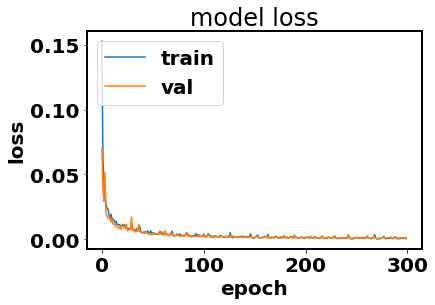

In [175]:
import keras
from matplotlib import pyplot as plt
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [176]:
# Predict the model 
y_train_pred_ann = model.predict(X_train_reg_) 
mae_train_ann = mean_absolute_error(y_train_reg_* target_stdev + target_mean, y_train_pred_ann* target_stdev + target_mean)
print('MAE train: ',mae_train_ann)
rmse_train_ann = mean_squared_error(y_train_reg_* target_stdev + target_mean, y_train_pred_ann* target_stdev + target_mean, squared=False)
print('RMSE train: ',rmse_train_ann)

MAE train:  9.229218142625761
RMSE train:  12.2807871484895


In [177]:
# Predict the model 
y_test_pred_ann = model.predict(X_test_reg_) 
mae_test_ann = mean_absolute_error(y_test_reg_* target_stdev + target_mean, y_test_pred_ann* target_stdev + target_mean)
print('MAE test: ',mae_test_ann)
rmse_test_ann = mean_squared_error(y_test_reg_* target_stdev + target_mean, y_test_pred_ann* target_stdev + target_mean, squared=False)
print('RMSE test: ',rmse_test_ann)

MAE test:  10.063837466032613
RMSE test:  16.35569901096428


In [178]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_10 (Dense)            (None, 256)               2816      
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 46,081
Trainable params: 46,081
Non-trainable

In [179]:
y_check_pred_nn = model.predict(X_check_reg)
y_check_pred_nn=y_check_pred_nn.flatten()
mae_check_nn = mean_absolute_error(y_check_reg* target_stdev + target_mean, y_check_pred_nn* target_stdev + target_mean)
print('Mean absolute Error : ',mae_check_nn)
rmse_check_nn = mean_squared_error(y_check_reg* target_stdev + target_mean, y_check_pred_nn* target_stdev + target_mean, squared=False)
print('Root Mean Squared Error : ',rmse_check_nn)

Mean absolute Error :  109.85712402343756
Root Mean Squared Error :  132.6433234044725


## Comparison

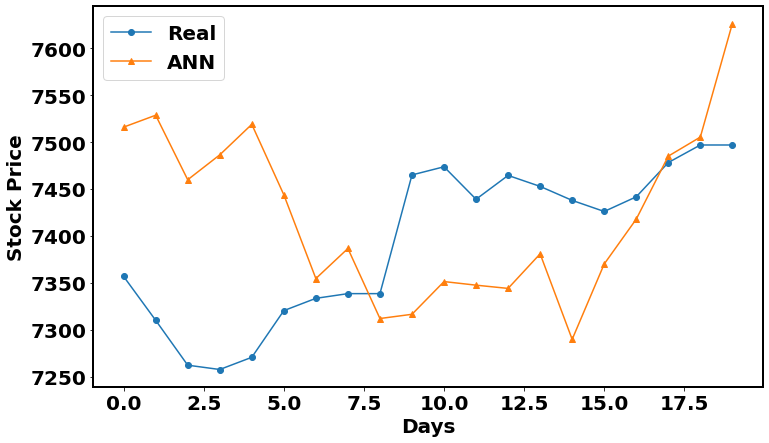

In [180]:
plt.figure(figsize=(12, 7))
# plt.plot(y_test_reg* target_stdev + target_mean, label = "Real",marker='o')
plt.plot(y_check_reg.values* target_stdev + target_mean, label = "Real",marker='o')
# plt.plot(y_check_pred_lstm* target_stdev + target_mean, label = "LSTM Prediction",marker='^')
# plt.plot(y_check_pred_arima* target_stdev + target_mean, label = "ARIMA Prediction",marker='^')
# plt.plot(y_check_pred_mlr* target_stdev + target_mean, label = "MLR Prediction",marker='^')
# plt.plot(y_check_pred_xg* target_stdev + target_mean, label = "XG boost",marker='^')
plt.plot(y_check_pred_nn* target_stdev + target_mean, label = "ANN",marker='^')
plt.ylabel('Stock Price')
plt.xlabel('Days')
plt.legend()
plt.show()